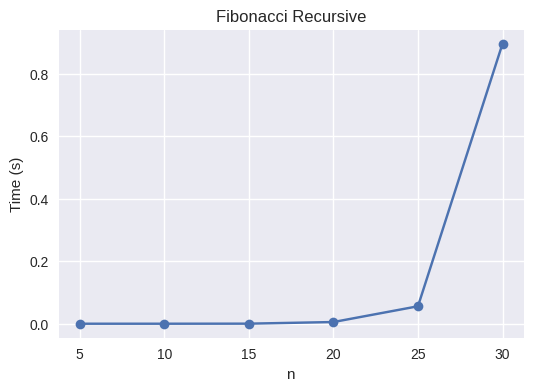

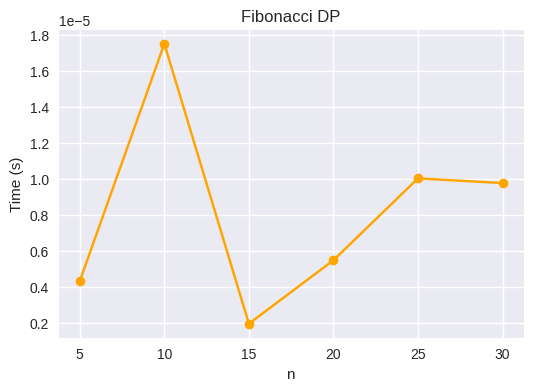

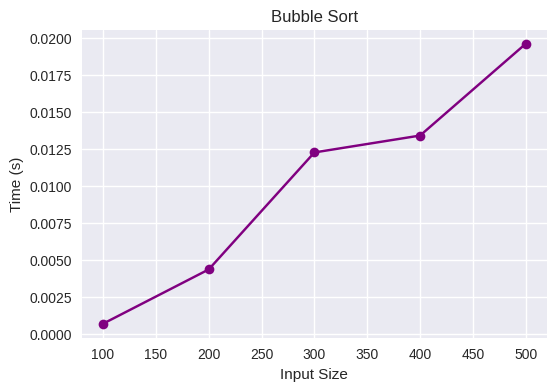

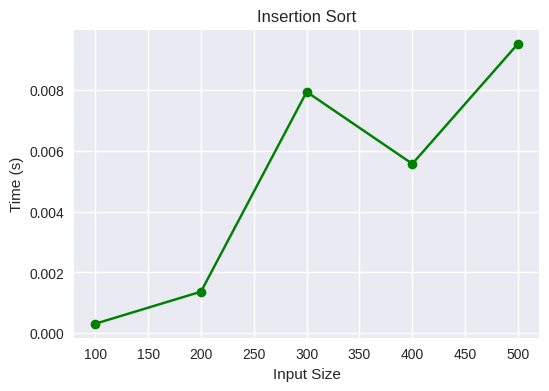

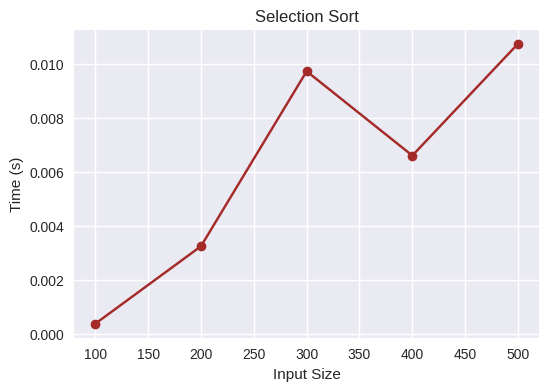

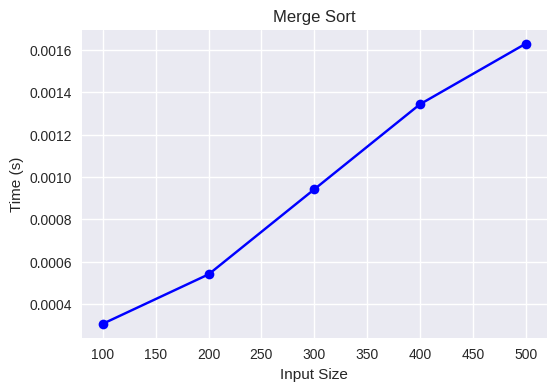

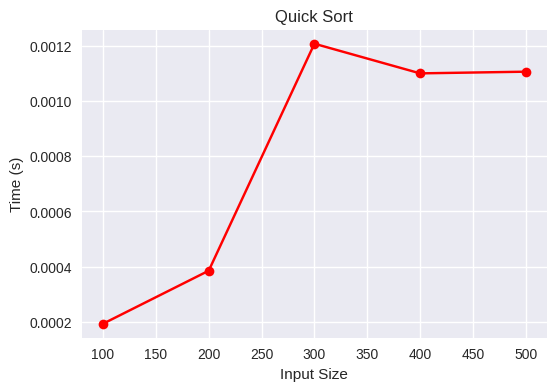

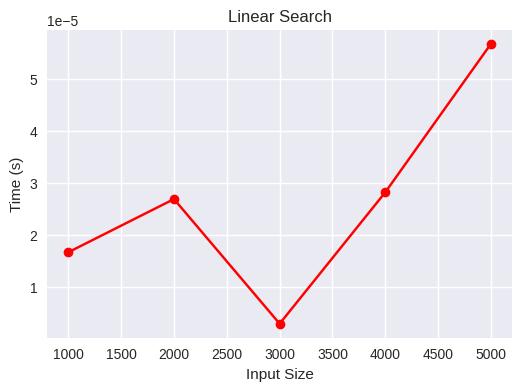

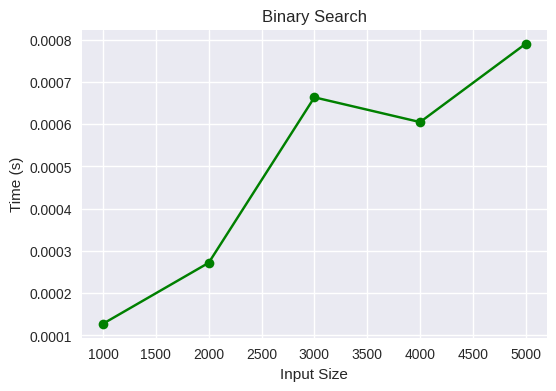

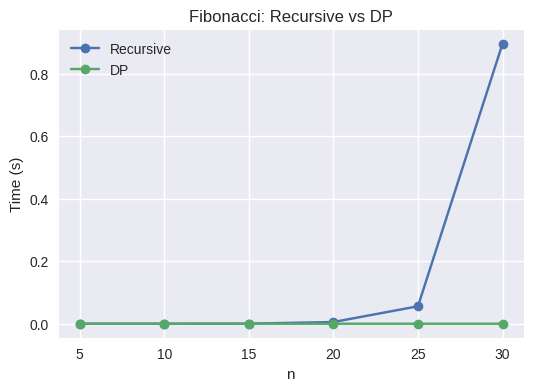

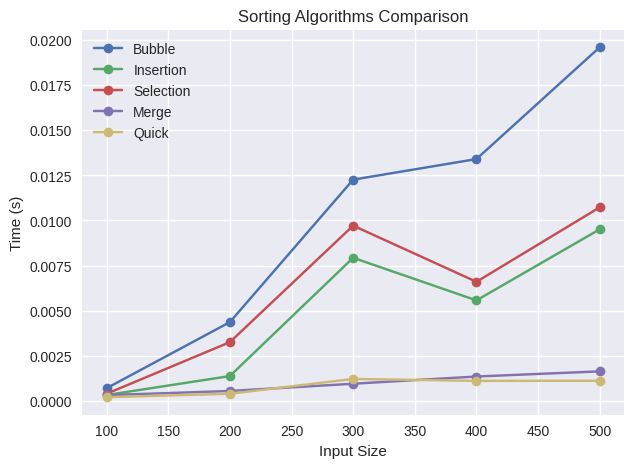

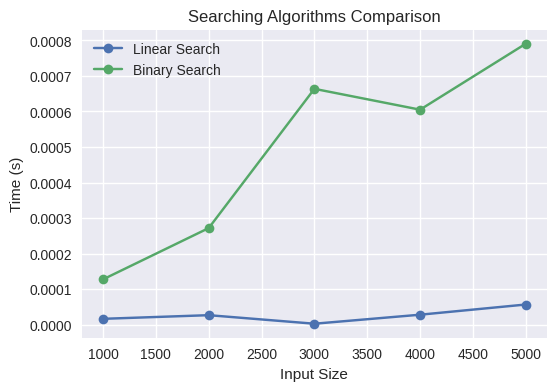

In [3]:
import time
import random
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")



def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

def fib_dp(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n+1):
        a, b = b, a+b
    return b

fib_sizes = [5, 10, 15, 20, 25, 30]
time_rec = []
time_dp = []

for n in fib_sizes:
    t0 = time.perf_counter()
    fib_recursive(n)
    time_rec.append(time.perf_counter() - t0)

    t0 = time.perf_counter()
    fib_dp(n)
    time_dp.append(time.perf_counter() - t0)





plt.figure(figsize=(6,4))
plt.plot(fib_sizes, time_rec, marker='o')
plt.title("Fibonacci Recursive")
plt.xlabel("n")
plt.ylabel("Time (s)")
plt.grid(True)
plt.show()


plt.figure(figsize=(6,4))
plt.plot(fib_sizes, time_dp, marker='o', color='orange')
plt.title("Fibonacci DP")
plt.xlabel("n")
plt.ylabel("Time (s)")
plt.grid(True)
plt.show()



def bubble_sort(a):
    arr = a[:]
    for i in range(len(arr)):
        for j in range(len(arr)-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def insertion_sort(a):
    arr = a[:]
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

def selection_sort(a):
    arr = a[:]
    for i in range(len(arr)):
        min_i = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_i]:
                min_i = j
        arr[i], arr[min_i] = arr[min_i], arr[i]
    return arr

def merge_sort(a):
    if len(a) <= 1:
        return a
    mid = len(a)//2
    L = merge_sort(a[:mid])
    R = merge_sort(a[mid:])
    out = []
    i = j = 0
    while i < len(L) and j < len(R):
        if L[i] < R[j]:
            out.append(L[i]); i+=1
        else:
            out.append(R[j]); j+=1
    return out + L[i:] + R[j:]

def quick_sort(a):
    if len(a) <= 1:
        return a
    pivot = a[len(a)//2]
    left = [x for x in a if x < pivot]
    mid  = [x for x in a if x == pivot]
    right = [x for x in a if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)


sort_sizes = [100, 200, 300, 400, 500]
t_bubble, t_insert, t_select, t_merge, t_quick = [], [], [], [], []

for size in sort_sizes:
    arr = [random.randint(0,1000) for _ in range(size)]

    for func, store in [
        (bubble_sort, t_bubble),
        (insertion_sort, t_insert),
        (selection_sort, t_select),
        (merge_sort, t_merge),
        (quick_sort, t_quick)
    ]:
        t0 = time.perf_counter()
        func(arr)
        store.append(time.perf_counter() - t0)




def plot_single(x, y, title, color="blue"):
    plt.figure(figsize=(6,4))
    plt.plot(x, y, marker='o', color=color)
    plt.title(title)
    plt.xlabel("Input Size")
    plt.ylabel("Time (s)")
    plt.grid(True)
    plt.show()

plot_single(sort_sizes, t_bubble,   "Bubble Sort",   "purple")
plot_single(sort_sizes, t_insert,   "Insertion Sort","green")
plot_single(sort_sizes, t_select,   "Selection Sort","brown")
plot_single(sort_sizes, t_merge,    "Merge Sort",    "blue")
plot_single(sort_sizes, t_quick,    "Quick Sort",    "red")



def linear_search(a, x):
    for v in a:
        if v == x:
            return True
    return False

def binary_search(a, x):
    arr = sorted(a)
    L, R = 0, len(arr)-1
    while L <= R:
        mid = (L+R)//2
        if arr[mid] == x: return True
        if arr[mid] < x: L = mid+1
        else: R = mid-1
    return False

search_sizes = [1000, 2000, 3000, 4000, 5000]
t_linear, t_binary = [], []

for size in search_sizes:
    arr = [random.randint(0,10000) for _ in range(size)]
    target = random.choice(arr)

    t0 = time.perf_counter()
    linear_search(arr, target)
    t_linear.append(time.perf_counter() - t0)

    t0 = time.perf_counter()
    binary_search(arr, target)
    t_binary.append(time.perf_counter() - t0)




plot_single(search_sizes, t_linear, "Linear Search", "red")
plot_single(search_sizes, t_binary, "Binary Search", "green")




plt.figure(figsize=(6,4))
plt.plot(fib_sizes, time_rec, marker='o', label="Recursive")
plt.plot(fib_sizes, time_dp, marker='o', label="DP")
plt.title("Fibonacci: Recursive vs DP")
plt.xlabel("n")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(7,5))
plt.plot(sort_sizes, t_bubble, marker='o', label="Bubble")
plt.plot(sort_sizes, t_insert, marker='o', label="Insertion")
plt.plot(sort_sizes, t_select, marker='o', label="Selection")
plt.plot(sort_sizes, t_merge, marker='o', label="Merge")
plt.plot(sort_sizes, t_quick, marker='o', label="Quick")
plt.title("Sorting Algorithms Comparison")
plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(6,4))
plt.plot(search_sizes, t_linear, marker='o', label="Linear Search")
plt.plot(search_sizes, t_binary, marker='o', label="Binary Search")
plt.title("Searching Algorithms Comparison")
plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.show()